<a href="https://colab.research.google.com/github/denisbrunom/data_science_estudo/blob/master/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Criaremos agora uma nuvem de palavras ou nuvem de tag. Essa é um tipo de visualização de dados muito utilizada quando estamos trabalhando com textos, documentos, entre outras.
Basicamente analisaremos a frequencia que determinadas palavras aparecem e contaremos cada palavra para criarmos nossa nuvem de palavras.
Usaremos os dados de Nova York com data de 08/ de abril de 2020.


In [0]:
#instalando o wordcloud para plotar nossa nuvem de palavras
!pip install wordcloud -q


In [0]:
#importar as principais bibliotecas que vamos utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #importamos wordcloud para a criação da nuvem, stopwords para as palavaras que não queremos e imagecolergenerator para sobrebor as nuvens sobre uma imagem.



In [0]:
#importar nossa base de dados, baixei do Airbnb, deixei o link no final do codigo.
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Treino_pessoal/listings.csv")

In [0]:
#verificação do dataset, com o comando df.head() ele mostra as 5 primeiras linhas do dataset
df.head()

In [69]:
#Verificação com numero de linhas e colunas respectivamente
df.shape

(50378, 106)

In [0]:
#Eliminar colunas sem informação.
summary = df.dropna(subset=['summary'], axis=0)['summary']


O dataset que a Airbnb fornece é bem limpo e como nesse momento vamos utilizar apenas um campo (summary), vamos nos manter em apenas esse tratamento, para trabalhos futuros trabalharemos melhor os dados que serão interessantes para a analise.


In [0]:
#vamos listar algumas descrições aleatorias para termos como base o texto.
display(summary.iloc[200])
display(summary.iloc[400])
display(summary.iloc[847])
display(summary.iloc[1000])
display(summary.iloc[1234])
display(summary.iloc[1345])

Dados tratados precisamos agora juntar todos os textos para uma busca e contagem nas palavras mais recorentes nos textos para assim criarmos nossa nuvem de palavras.

In [0]:
# Utilizaremos o join para juntar os campos que são strings, utilizaremos o " "(espaço para separar as palavras)
todas_descricoes = " ".join(s for s in summary)

In [0]:
#depois de unificar vamos verificar quantas palavras teremos que pesquisar:
print ("Quantidade de palavras: {}".format(len(todas_descricoes)))

Analisaremos mais de 16 milhões de palavras!!! 
Mas ainda temos um problema, dentre todas essas palavras temos palavras que não interessa na analise.
exemplo and, I, not, but, for, do , be, of, entre outras.
Vamos remover essas palavras da nossa analise.


In [0]:
#vamos agora excluir as palavras da nossa pesquisa
stopwords = set(STOPWORDS)
stopwords.update(["i", 'do', "not", "do", "be", "of", "to", "my", "me", "&", "in"]) #Aqui criamos a lista das palavras que não queremos na nossa pesquisa, adicionei as que lembrei e consegui achar na verificação que fizemos.

Depois de tudo campos vazios removidos e palavras que não interessa pra pesquisa, vamos gerar nossa nuvem de palavras!!


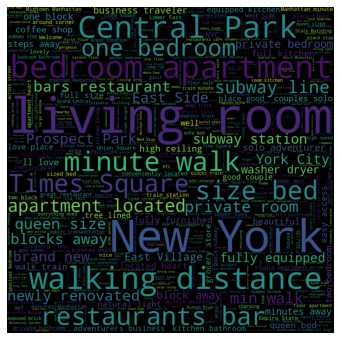

In [86]:
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=500, max_font_size=200, min_font_size=1).generate(todas_descricoes)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")